# EDO
Ce notebook contient le complément du cours sur les équations différentielles ordinaires.
Nous allons traiter plusieurs exemples au cas par cas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ordre 1
Nous allons implémenter la méthode des graphes pour résoudre des problèmes pas à pas.
Supposons que nous avons une certaine équation différentielle
$$
F(x,u) = u'
$$
On se donne une suite de valeurs ordonnée $(x_n)$ "proches" les unes des autres.
Par définition de la dérivée, on a
$$
u'(x_n) \simeq \frac{u(x_{n+1}) - u(x_n)}{x_{n+1} - x_n}
$$
On en déduit une approximation pas à pas notée $(y_n)$ de $u(x_n)$
$$
y_{n+1} = y_n + (x_{n+1}-x_n)F(x_n,y_n)
$$
On se sert de cette méthode pour estimer $u(x_N)$ avec la valeur de $x_N$ fixée.
Attention : ici c'est $N$ qui varie pour définir la précision, i.e. grand $N$ = petit pas = grande précision.
Implémentons tout ça :


In [ ]:
def schema_d_Euler(F, x_0, y_0, x_N, N):
  X = [x_0]
  Y = [y_0]
  for i in range(N):
    X.append(X[-1] + (x_N - x_0) / N)
    Y.append(Y[-1] + (X[-1] - X[-2]) * F(X[-2], Y[-1]))
  return X, Y

Pour tester notre méthode, nous allons nous intéresser au problème de Cauchy suivant : 
$$
\begin{cases}
f = f'\\
f(0) = 1
\end{cases}
$$
On connait la solution de ce problème : l'exponentielle.
Ici $F (x,y) = y$.

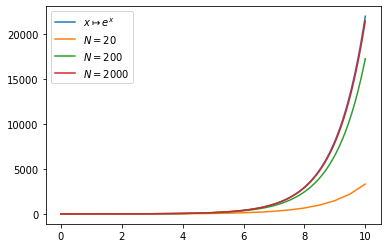

In [ ]:
def F(x,y):
  return y

x_0 = 0
y_0 = 1

plt.plot(np.linspace(0,10,200), np.exp(np.linspace(0,10,200)) , label = r'$x\mapsto e^x$')
X,Y = schema_d_Euler(F=F, x_0=x_0, y_0=y_0, x_N=10, N=20)
plt.plot(X,Y, label = r'$N=20$')
X,Y = schema_d_Euler(F=F, x_0=x_0, y_0=y_0, x_N=10, N=200)
plt.plot(X,Y, label = r'$N=200$')
X,Y = schema_d_Euler(F=F, x_0=x_0, y_0=y_0, x_N=10, N=2000)
plt.plot(X,Y, label = r'$N=2000$')
plt.legend()
plt.show()
plt.close()

On observe bien que plus la valeur de $N$ est grande plus la solution approximée est correcte.

### Exercices :
Resoudre les équations suivantes et définir $F$ pour la méthode d'Euler :

1) $y' − xy = 0$

2) $2xy' + y = 0$

3) $xy' − y = 0$

4) $y' + \frac{2}{x}y = 0$

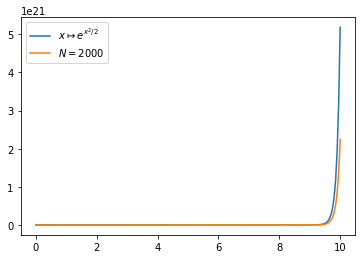

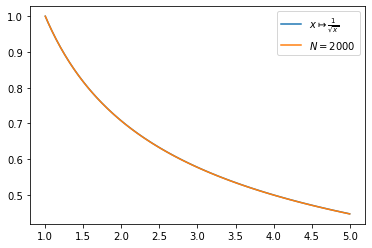

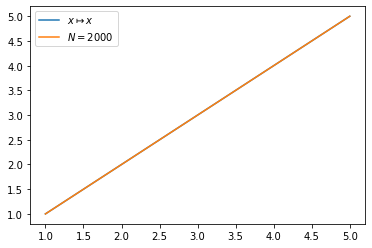

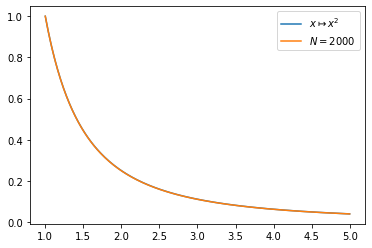

In [ ]:
def F(x,y):
  return x * y
X=np.linspace(0,10,200)
plt.plot(X, np.exp(X**2/2) , label = r'$x\mapsto e^{x^2/2}$')
X,Y = schema_d_Euler(F=F, x_0=0, y_0=1, x_N=10, N=2000)
plt.plot(X,Y, label = r'$N=2000$')
plt.legend()
plt.show()
plt.close()

def F(x,y):
  return -y / (2 * x)
X=np.linspace(1,5,200)
plt.plot(X, 1 / np.sqrt(X) , label = r'$x\mapsto \frac{1}{\sqrt{x}}$')
X,Y = schema_d_Euler(F=F, x_0=1, y_0=1, x_N=5, N=2000)
plt.plot(X,Y, label = r'$N=2000$')
plt.legend()
plt.show()
plt.close()

def F(x,y):
  return y / x
X=np.linspace(1,5,200)
plt.plot(X, X , label = r'$x\mapsto x$')
X,Y = schema_d_Euler(F=F, x_0=1, y_0=1, x_N=5, N=2000)
plt.plot(X,Y, label = r'$N=2000$')
plt.legend()
plt.show()
plt.close()

def F(x,y):
  return  - 2 * y / x
X=np.linspace(1,5,200)
plt.plot(X, 1 / X**2 , label = r'$x\mapsto x^2$')
X,Y = schema_d_Euler(F=F, x_0=1, y_0=1, x_N=5, N=2000)
plt.plot(X,Y, label = r'$N=2000$')
plt.legend()
plt.show()
plt.close()

Si la courbe orange (approximation) recouvre la courbe bleue (solution) c'est bon.
En effet, ça monte la qualité de l'approximation et qu'on a trouvé une bonne solution de notre EDO :)

## Ordre 2

Ici nous n'allons pas voir de méthode numérique pour estimer les solutions d'un système à l'ordre bien que ce genre de méthodes existent.

Nous allons simplement faire des petits exercices :

1) y'' − 4y' + 3y = 0

2) y'' − 6y' + 9y = 0

3) y'' + y' + y = 0.

4) $\theta''(t) + \omega_0^2 \theta(t) = 0$ (petites oscillations d’un pendule) ici $\theta$ est un angle et $\omega_0$ est la pulsation propre du système.
 